In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
warnings.filterwarnings("ignore")
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
ag = pd.read_csv('./age_gender_info.csv')
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False


In [2]:
df = pd.concat([train,test]).reset_index(drop=True) #이상치, 결측치 한번에 처리하기 위해 병합

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          3974 non-null   object 
 1   총세대수                          3974 non-null   int64  
 2   임대건물구분                        3974 non-null   object 
 3   지역                            3974 non-null   object 
 4   공급유형                          3974 non-null   object 
 5   전용면적                          3974 non-null   float64
 6   전용면적별세대수                      3974 non-null   int64  
 7   공가수                           3974 non-null   float64
 8   자격유형                          3972 non-null   object 
 9   임대보증금                         3225 non-null   object 
 10  임대료                           3225 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  3721 non-null   float64
 12  도보 10분거리 내 버스정류장 수            3970 non-null   float64
 13  단지내

# 결측값 처리

In [4]:
df[df['임대료']=='-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2043,C1397,370,아파트,서울특별시,장기전세,23.32,51,9.0,A,87444000,-,0.0,3.0,1590.0,1595.0
2044,C1397,370,아파트,서울특별시,장기전세,46.79,4,9.0,A,174888000,-,0.0,3.0,1590.0,1595.0
2045,C1397,370,아파트,서울특별시,장기전세,46.91,69,9.0,A,174888000,-,0.0,3.0,1590.0,1595.0
2046,C1397,370,아파트,서울특별시,장기전세,51.96,24,9.0,A,194562000,-,0.0,3.0,1590.0,1595.0
2047,C1397,370,아파트,서울특별시,장기전세,51.99,80,9.0,A,194562000,-,0.0,3.0,1590.0,1595.0
2048,C1397,370,아파트,서울특별시,장기전세,59.93,142,9.0,A,216423000,-,0.0,3.0,1590.0,1595.0
2100,C1039,790,아파트,서울특별시,장기전세,51.32,126,13.0,A,187694000,-,0.0,3.0,673.0,645.0
2101,C1039,790,아파트,서울특별시,장기전세,59.88,49,13.0,A,213863000,-,0.0,3.0,673.0,645.0
2102,C1039,790,아파트,서울특별시,장기전세,59.94,75,13.0,A,213863000,-,0.0,3.0,673.0,645.0
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0


In [5]:
df.loc[df['공급유형']=='장기전세','임대료'] = 0 #장기전세, 공공분양의 임대료 0
df.loc[df['공급유형']=='공공분양','임대료'] = 0 #장기전세, 공공분양의 임대료 0
df['임대보증금'] = df['임대보증금'].replace('-', np.NAN) #'-'로 표기되어있는 결측치 NAN으로 대체
df['임대료'] = df['임대료'].replace('-', np.NAN)

In [6]:
display(df.isnull().sum()) #결측값

단지코드                               0
총세대수                               0
임대건물구분                             0
지역                                 0
공급유형                               0
전용면적                               0
전용면적별세대수                           0
공가수                                0
자격유형                               2
임대보증금                            767
임대료                              760
도보 10분거리 내 지하철역 수(환승노선 수 반영)     253
도보 10분거리 내 버스정류장 수                 4
단지내주차면수                            0
등록차량수                           1022
dtype: int64

In [7]:
df[['임대보증금','임대료']] = df[['임대보증금','임대료']].astype('float64')

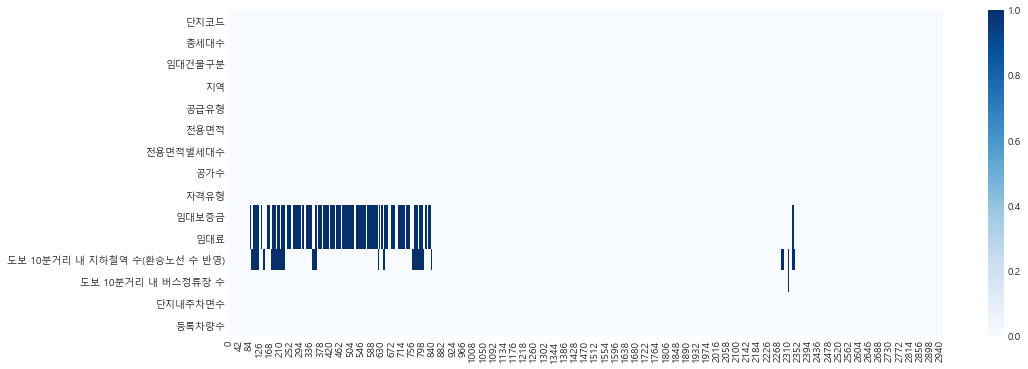

In [8]:
plt.figure(figsize=(16, 6)) #결측값 heatmap
sns.heatmap(train.isnull().T, cmap='Blues')
plt.show()

<AxesSubplot:xlabel='전용면적', ylabel='임대건물구분'>

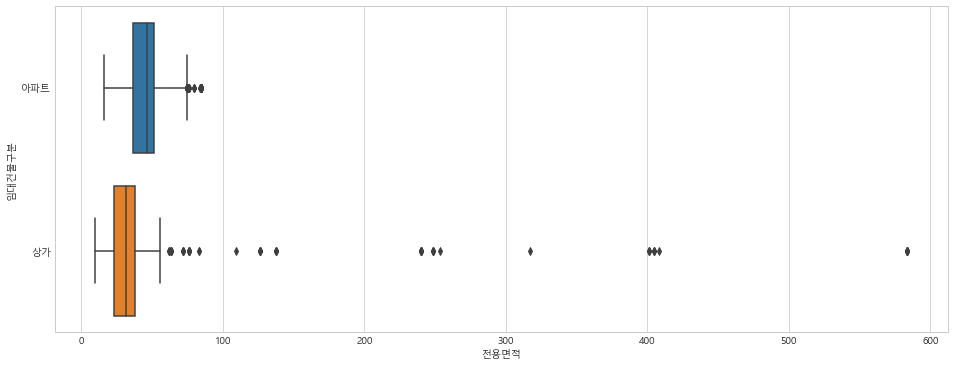

In [10]:
plt.figure(figsize=(16, 6))
sns.boxplot(x = "전용면적",  data = df, y = '임대건물구분')

In [13]:
quantile_25 = np.percentile(df['전용면적'].values, 25) 
quantile_75 = np.percentile(df['전용면적'].values, 75)

IQR = quantile_75 - quantile_25
IQR_weight = IQR*5
  
lowest = quantile_25 - IQR_weight
highest = quantile_75 + IQR_weight
  
outlier_idx = df['전용면적'][(df['전용면적'] < lowest) | (df['전용면적'] > highest)]

In [14]:
df = df.drop(outlier_idx.index, axis=0) #해당 데이터셋의 대부분이 소규모 상가 or 주거목적의 소규모 주택, 따라서 전용면적이 
#큰 관측치들은 삭제

In [15]:
df[df['임대료'].isnull()]['임대건물구분'].value_counts() #상가 임대료 데이터는 모두 결측치 -> 외부데이터 활용

상가     712
아파트     21
Name: 임대건물구분, dtype: int64

In [16]:
df[df['임대료'].isnull()]['지역'].unique()

array(['강원도', '충청남도', '경상남도', '대전광역시', '부산광역시', '제주특별자치도', '대구광역시',
       '울산광역시'], dtype=object)

# 임대건물구분이 상가인 임대료,임대보증금 결측값 처리

상가 임대료 
강원도 m2당 임대료 : 12400
충청남도 m2 임대료 12000
경남 : 12800
대전 13000
부산 27000
제주 12600
대구 20700
울산 13900
https://sg.sbiz.or.kr/godo/stat/rent.sg

임대보증금은 임대료 12월치 기준잡음 http://economychosun.com/client/news/view.php?boardName=C05&t_num=9624

In [17]:
for index,row in df[(df['임대료'].isnull()) & (df['임대건물구분']=='상가')].iterrows():
    if row['지역'] == '강원도':
        df.loc[index,'임대료'] = 12400 * row['전용면적']
        df.loc[index,'임대보증금'] = 12400 * row['전용면적'] * 12
    elif row['지역'] == '충청남도':
        df.loc[index,'임대료'] = 12000 * row['전용면적']
        df.loc[index,'임대보증금'] = 12000 * row['전용면적'] * 12
    elif row['지역'] == '경상남도':
        df.loc[index,'임대료'] = 12800 * row['전용면적']
        df.loc[index,'임대보증금'] = 12800 * row['전용면적'] * 12
    elif row['지역'] == '대전광역시':
        df.loc[index,'임대료'] = 13000 * row['전용면적']
        df.loc[index,'임대보증금'] = 13000 * row['전용면적'] * 12
    elif row['지역'] == '부산광역시':
        df.loc[index,'임대료'] = 27000 * row['전용면적']
        df.loc[index,'임대보증금'] = 27000 * row['전용면적'] * 12
    elif row['지역'] == '제주특별자치도':
        df.loc[index,'임대료'] = 12600 * row['전용면적']
        df.loc[index,'임대보증금'] = 12600 * row['전용면적'] * 12
    elif row['지역'] == '대구광역시':
        df.loc[index,'임대료'] = 20700 * row['전용면적']
        df.loc[index,'임대보증금'] = 20700 * row['전용면적'] * 12
    elif row['지역'] == '울산광역시':
        df.loc[index,'임대료'] = 13900 * row['전용면적']
        df.loc[index,'임대보증금'] = 13900 * row['전용면적'] * 12

# 임대건물 구분 아파트의 임대 보증금 결측치 처리

In [19]:
pd.set_option('display.max_row', 100)
df[(df['임대료'].notnull()) & (df['임대보증금'].notnull())].groupby(['공급유형','지역']).mean()

총세대수       전용면적    전용면적별세대수        공가수  \
공급유형      지역                                                       
공공임대(10년) 강원도       519.428571  80.614286  155.857143   5.428571   
          경기도       847.928571  73.214762  139.166667   7.404762   
          경상남도      593.423077  76.981923  139.576923  11.461538   
          경상북도      635.500000  68.705000  104.125000  33.000000   
          광주광역시     799.272727  64.424545  141.272727   8.454545   
          대구광역시     891.676471  67.155588  108.058824  14.852941   
          대전광역시    1044.000000  57.230000  102.833333   7.500000   
          부산광역시     908.000000  77.380000  227.000000  27.000000   
          서울특별시     703.666667  70.662000   64.933333   1.333333   
          세종특별자치시  1216.511628  71.329535   85.627907   2.232558   
          울산광역시     404.000000  84.975000  101.000000   1.000000   
          전라남도      987.750000  76.148750  228.125000  27.625000   
          전라북도      818.000000  82.387500  204.500000   0.000000   
          충청남도      538.000000  54.386667  113.333333   5.000000   
          충청북도      721.680000  69.486400  150.520000  12.440000   
공공임대(50년) 강원도       716.000000  44.510000  188.000000   0.500000   
          경상남도      388.000000  46.326667  128.333333   0.000000   
          대전광역시     711.250000  44.895000  396.000000   2.000000   
          부산광역시     459.000000  41.428333  133.750000   2.666667   
          서울특별시     512.000000  39.820000  512.000000  15.000000   
          제주특별자치도   590.000000  49.535000   73.750000   1.000000   
          충청남도      598.300000  38.951000  140.500000   3.000000   
공공임대(5년)  대전광역시     636.000000  48.886667  135.333333   1.000000   
공공임대(분납)  대전광역시    1044.000000  57.230000  126.666667   7.500000   
          서울특별시     726.777778  82.395556   85.777778   0.000000   
          충청남도      538.000000  54.386667   66.000000   5.000000   
국민임대      강원도       533.631579  45.518772  116.309942  12.146199   
          경기도       925.302905  45.208658  115.879668  12.582296   
          경상남도      742.068826  44.047814  135.133603  15.647773   
          경상북도      586.932927  45.134634  100.896341  19.018293   
          광주광역시     845.681481  45.582815  133.874074  15.925926   
          대구광역시     801.306818  42.769886  141.000000  17.022727   
          대전광역시    1021.600000  45.693304  128.600000  11.504348   
          부산광역시     855.442105  47.177789  164.368421  22.515789   
          서울특별시     938.076923  40.323077  101.000000   9.769231   
          세종특별자치시  1020.666667  33.826000  217.600000  21.733333   
          울산광역시     660.000000  45.790263  197.026316  22.894737   
          전라남도      600.633094  42.428921   88.633094  12.561151   
          전라북도      651.174242  43.561364  118.515152  11.143939   
          제주특별자치도   541.223881  42.778358  109.432836   8.253731   
          충청남도      512.134328  45.142687  110.746269  10.611940   
          충청북도      670.012270  43.115092  120.484663  19.306748   
영구임대      강원도       788.923077  30.600000  169.576923   5.000000   
          경기도      1341.480000  26.159200   90.400000  10.000000   
          경상남도      696.148148  29.063333  184.888889   5.259259   
          광주광역시     922.000000  23.760000  125.000000   7.000000   
          대구광역시    1145.000000  26.572500  103.000000  14.500000   
          대전광역시    1324.638889  31.701944  265.611111  16.555556   
          부산광역시    1767.857143  28.812857  556.107143  10.357143   
          서울특별시     955.000000  28.086000   58.400000   9.400000   
          울산광역시    1248.400000  27.360000  472.400000  16.000000   
          전라남도      516.666667  24.715000   72.333333   9.333333   
          전라북도      479.500000  24.072500  102.000000   8.000000   
          제주특별자치도   560.500000  28.410000  274.000000   2.500000   
          충청남도      806.833333  28.833889  245.888889   3.611111   
          충청북도      120.000000  24.685000   54.000000   8.000000   
임대상가      강원도       862.891892  36.714054    1.000000   0.702703   
          경상남도

In [22]:
for index,row in df[df['임대료'].isnull()].iterrows(): #아파트 임대료 , 임대보증금 결측치는 시도별, 공급유형별 평균값 이용
    if (row['공급유형']=='국민임대') & (row['지역']=='부산광역시'):
        df.loc[index,'임대료'] = 210162
        df.loc[index,'임대보증금'] = 2790129
    elif (row['공급유형']=='국민임대') & (row['지역']=='대구광역시'):
        df.loc[index,'임대료'] = 166288
        df.loc[index,'임대보증금'] = 2048957
    elif (row['공급유형']=='행복주택') & (row['지역']=='강원도'):
        df.loc[index,'임대료'] = 145160
        df.loc[index,'임대보증금'] = 3056000
    elif (row['공급유형']=='행복주택') & (row['지역']=='경상남도'):
        df.loc[index,'임대료'] = 73609
        df.loc[index,'임대보증금'] = 4124906
    elif (row['공급유형']=='영구임대') & (row['지역']=='강원도'):
        df.loc[index,'임대료'] = 93721
        df.loc[index,'임대보증금'] = 6024577
    elif (row['공급유형']=='영구임대') & (row['지역']=='대전광역시'):
        df.loc[index,'임대료'] = 94103
        df.loc[index,'임대보증금'] = 8787750

In [23]:
df[df['임대보증금'].isnull()] 

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2331,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,0.0,NaN,6.0,1636.0,2315.0
2332,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,0.0,NaN,6.0,1636.0,2315.0
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,0.0,NaN,6.0,1636.0,2315.0
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,0.0,NaN,6.0,1636.0,2315.0
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,0.0,NaN,6.0,1636.0,2315.0
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,0.0,NaN,6.0,1636.0,2315.0
2337,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,0.0,NaN,6.0,1636.0,2315.0


In [24]:
df = df.drop(df[df['임대보증금'].isnull()].index, axis =0)  #공급유형이 공공분양 결측치 삭제

In [25]:
display(df.isnull().sum())

단지코드                               0
총세대수                               0
임대건물구분                             0
지역                                 0
공급유형                               0
전용면적                               0
전용면적별세대수                           0
공가수                                0
자격유형                               2
임대보증금                              0
임대료                                0
도보 10분거리 내 지하철역 수(환승노선 수 반영)     241
도보 10분거리 내 버스정류장 수                 4
단지내주차면수                            0
등록차량수                           1013
dtype: int64

# '도보 10분거리 내 지하철역 수(환승노선 수 반영) 결측치 처리

In [26]:
df.loc[df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['지역'].value_counts()

충청남도     144
대전광역시     93
경상남도       4
Name: 지역, dtype: int64

In [27]:
df[df['지역']=='경상남도']['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].mean()

0.008928571428571428

In [28]:
df[df['지역']=='대전광역시']['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].mean()

0.8341013824884793

In [29]:
df[df['지역']=='충청남도']['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].mean()

0.0

In [30]:
for index,row in df.loc[df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()].iterrows(): #지역별 평균값으로 대체
    if row['지역'] == '충청남도':
        df.loc[index,'도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = 0
    elif row['지역'] == '대전광역시':
        df.loc[index,'도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = 1
    elif row['지역'] == '경상남도':
        df.loc[index,'도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = 0

In [31]:
display(df.isnull().sum())

단지코드                               0
총세대수                               0
임대건물구분                             0
지역                                 0
공급유형                               0
전용면적                               0
전용면적별세대수                           0
공가수                                0
자격유형                               2
임대보증금                              0
임대료                                0
도보 10분거리 내 지하철역 수(환승노선 수 반영)       0
도보 10분거리 내 버스정류장 수                 4
단지내주차면수                            0
등록차량수                           1013
dtype: int64

# 도보 10분거리 내 버스정류장 수 결측값 처리

In [32]:
df[df['도보 10분거리 내 버스정류장 수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000.0,456000.0,0.0,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0


In [33]:
df[df['지역']=='경상남도']['도보 10분거리 내 버스정류장 수'].mean()

3.84375

In [34]:
df.loc[df[df['도보 10분거리 내 버스정류장 수'].isnull()].index,'도보 10분거리 내 버스정류장 수'] = 4  #지역별 평균값으로 대체

# 자격유형 결측값 처리

In [35]:
df[df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
3148,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0,NaN
3210,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0,NaN


In [36]:
df[df['단지코드']=='C2411']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
3145,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000.0,100720.0,0.0,2.0,840.0,NaN
3146,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000.0,100720.0,0.0,2.0,840.0,NaN
3147,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000.0,100720.0,0.0,2.0,840.0,NaN
3148,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0,NaN
3149,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000.0,171480.0,0.0,2.0,840.0,NaN


In [37]:
df[(df['단지코드']=='C2253') & (df['임대건물구분']=='아파트')]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
3210,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0,NaN
3211,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000.0,83020.0,0.0,2.0,173.0,NaN
3212,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000.0,83020.0,0.0,2.0,173.0,NaN


In [38]:
df.loc[3148,'자격유형'] = 'A' #각각 동일한 단지코드의 자격유형으로 대체 
df.loc[3210, '자격유형'] ='C'

In [39]:
display(df.isnull().sum())

단지코드                               0
총세대수                               0
임대건물구분                             0
지역                                 0
공급유형                               0
전용면적                               0
전용면적별세대수                           0
공가수                                0
자격유형                               0
임대보증금                              0
임대료                                0
도보 10분거리 내 지하철역 수(환승노선 수 반영)       0
도보 10분거리 내 버스정류장 수                 0
단지내주차면수                            0
등록차량수                           1013
dtype: int64

In [40]:
train = df.loc[:2951].reset_index(drop=True) #train,test set 분리
test = df.loc[2952:].reset_index(drop=True)

In [41]:
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000.0,116090.0,0.0,1.0,166.0,146.0
2923,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0
2924,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0
2925,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0


In [69]:
test

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000.0,189840.0,0.0,2.0,683.0,NaN
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000.0,249930.0,0.0,2.0,683.0,NaN
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000.0,249930.0,0.0,2.0,683.0,NaN
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000.0,249930.0,0.0,2.0,683.0,NaN
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000.0,296780.0,0.0,2.0,683.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,4124906.0,73609.0,0.0,1.0,467.0,NaN
1009,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000.0,106400.0,0.0,2.0,300.0,NaN
1010,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000.0,106400.0,0.0,2.0,300.0,NaN
1011,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000.0,144600.0,0.0,2.0,300.0,NaN


# 시각화

<AxesSubplot:xlabel='공급유형', ylabel='등록차량수'>

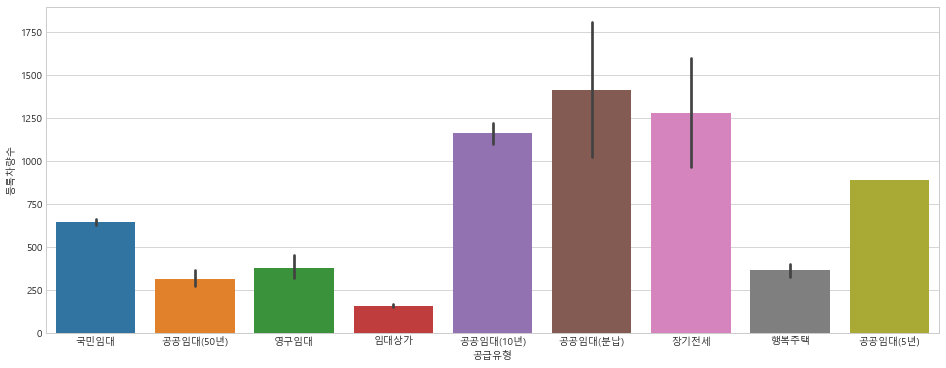

In [107]:
plt.figure(figsize=(16, 6))
sns.barplot(x='공급유형',y='등록차량수',data=train) 

<AxesSubplot:xlabel='자격유형', ylabel='등록차량수'>

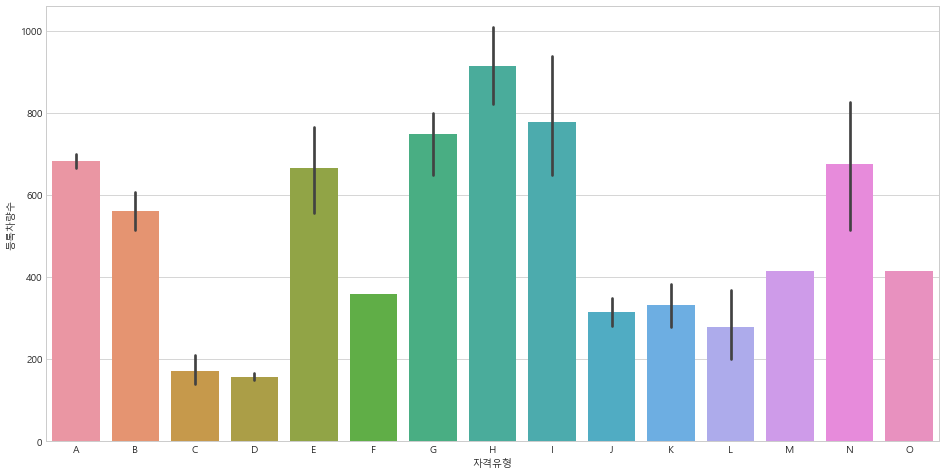

In [108]:
plt.figure(figsize=(16, 8))
sns.barplot(x='자격유형',y='등록차량수',data=train)

<AxesSubplot:xlabel='지역', ylabel='등록차량수'>

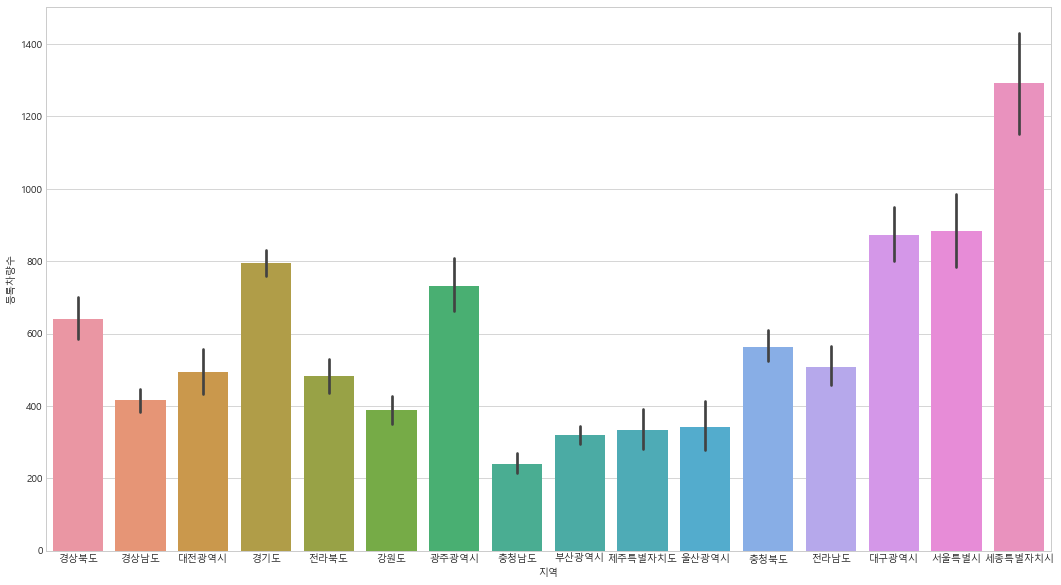

In [111]:
plt.figure(figsize=(18, 10))
sns.barplot(x='지역',y='등록차량수',data=train)

In [110]:
import plotly.express as px
px.box(train, x='지역', y='등록차량수')

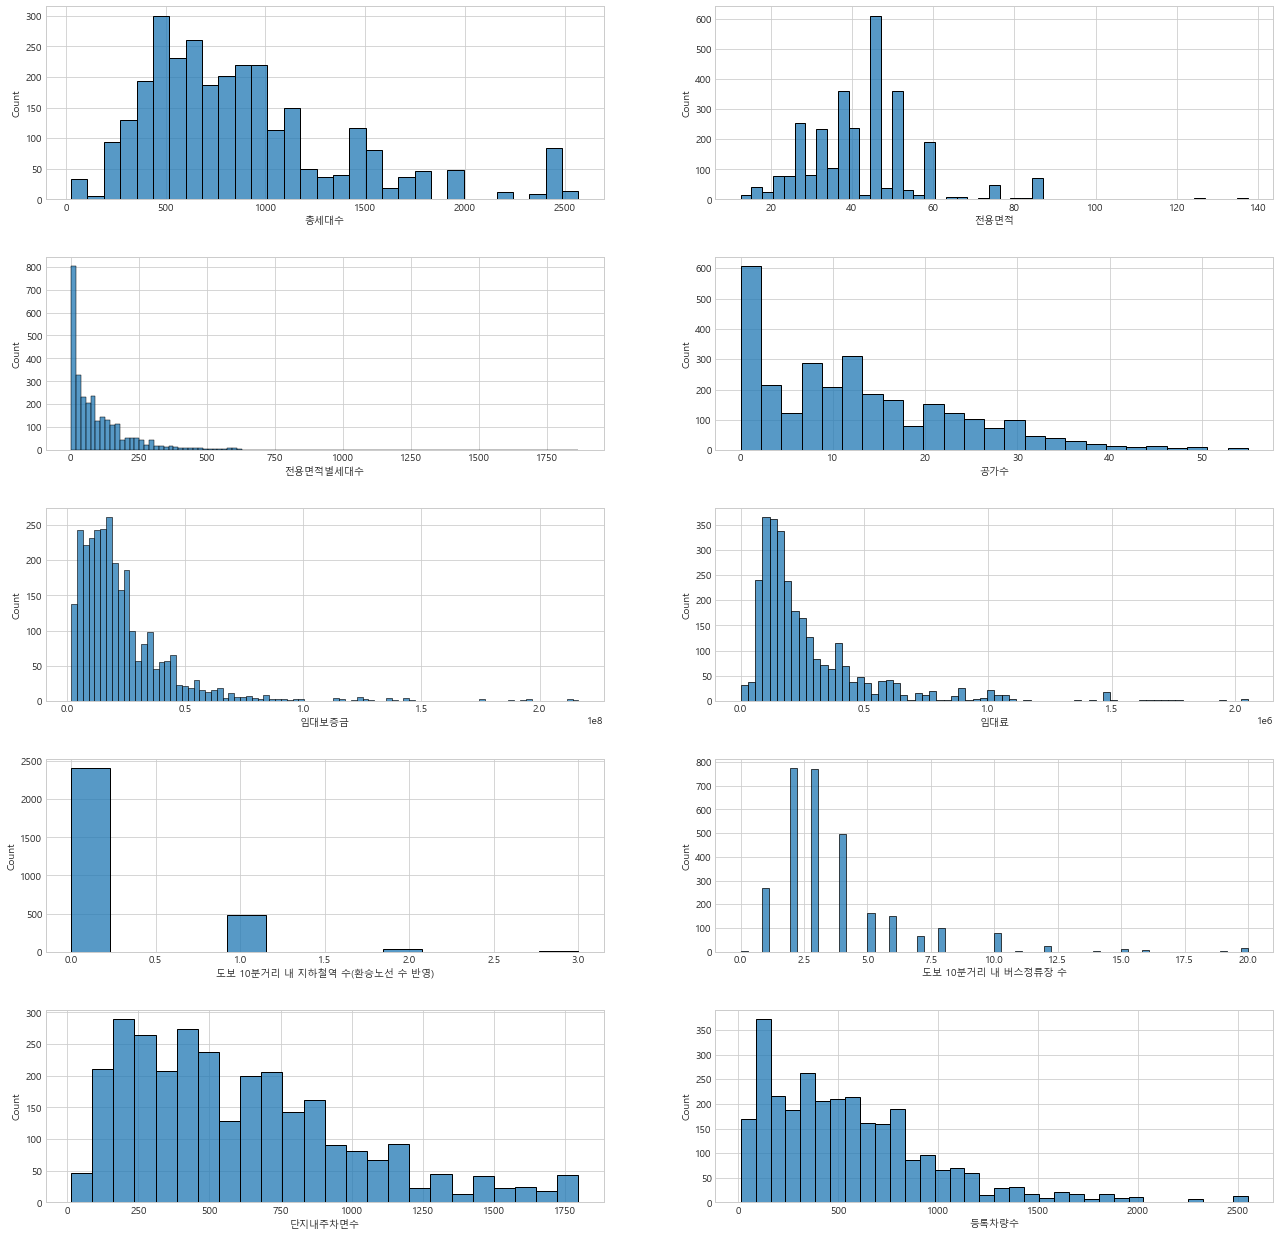

In [50]:
numeric_cols = []
for col in train.columns:
    if train[col].dtypes != 'object':
        numeric_cols.append(col)
        
numeric_cols
fig = plt.figure(figsize=(22, 22))
for i, n in enumerate(numeric_cols):  #numeric data 시각화
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(hspace=0.3)
    sns.histplot(train[n])

<AxesSubplot:>

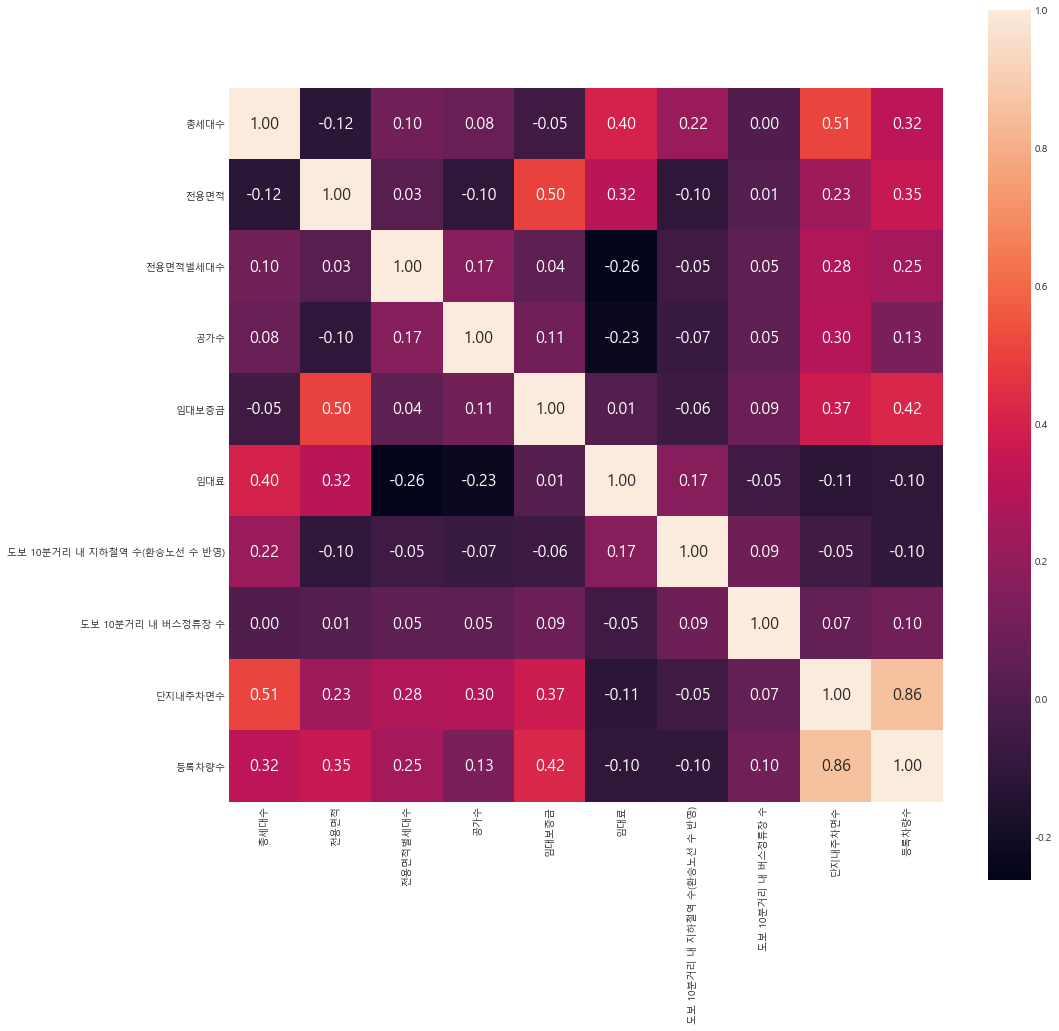

In [72]:
plt.figure(figsize=(16, 16))
sns.heatmap(train[numeric_cols].corr(method='pearson'), square = True,fmt='.2f', annot = True, annot_kws = {"size" : 16})

<AxesSubplot:xlabel='단지내주차면수', ylabel='등록차량수'>

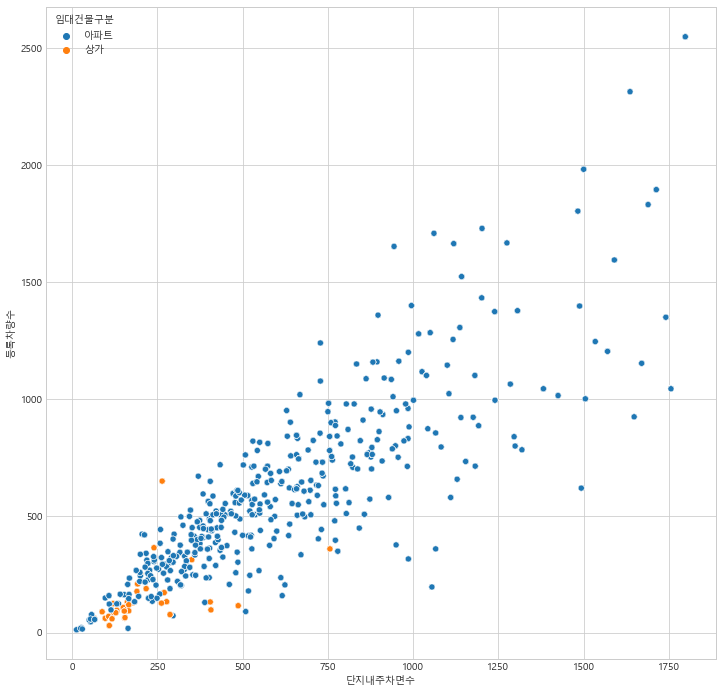

In [68]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x='단지내주차면수',y='등록차량수',data=train,hue='임대건물구분')

<AxesSubplot:xlabel='임대료', ylabel='지역'>

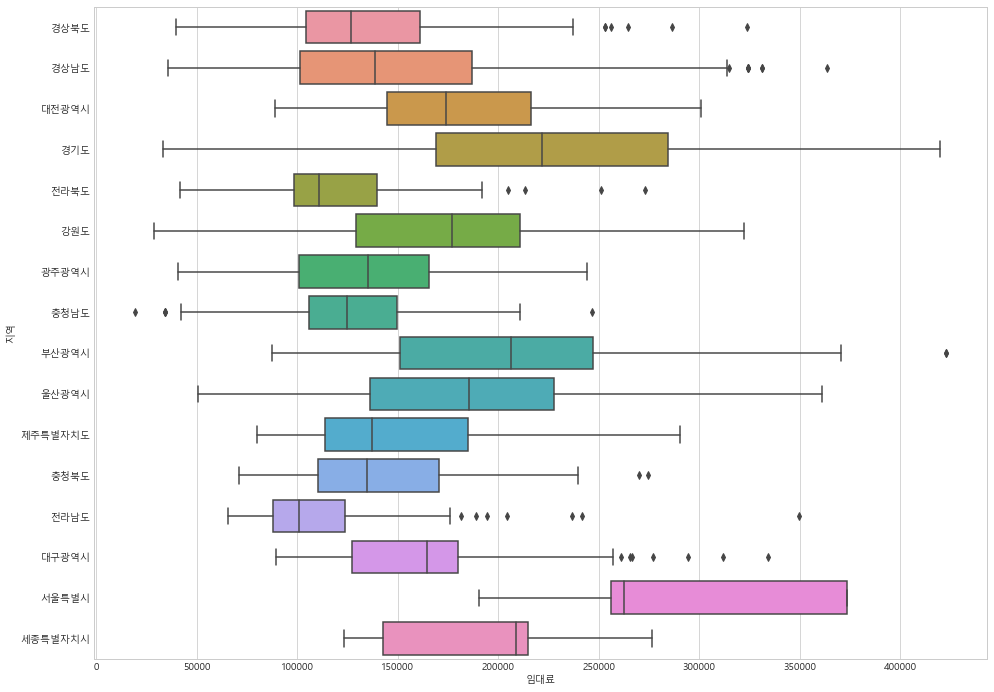

In [103]:
plt.figure(figsize=(16, 12))
sns.boxplot(x = "임대료",  data = df[(df['공급유형']=='국민임대')], y = '지역')

<AxesSubplot:xlabel='임대료', ylabel='지역'>

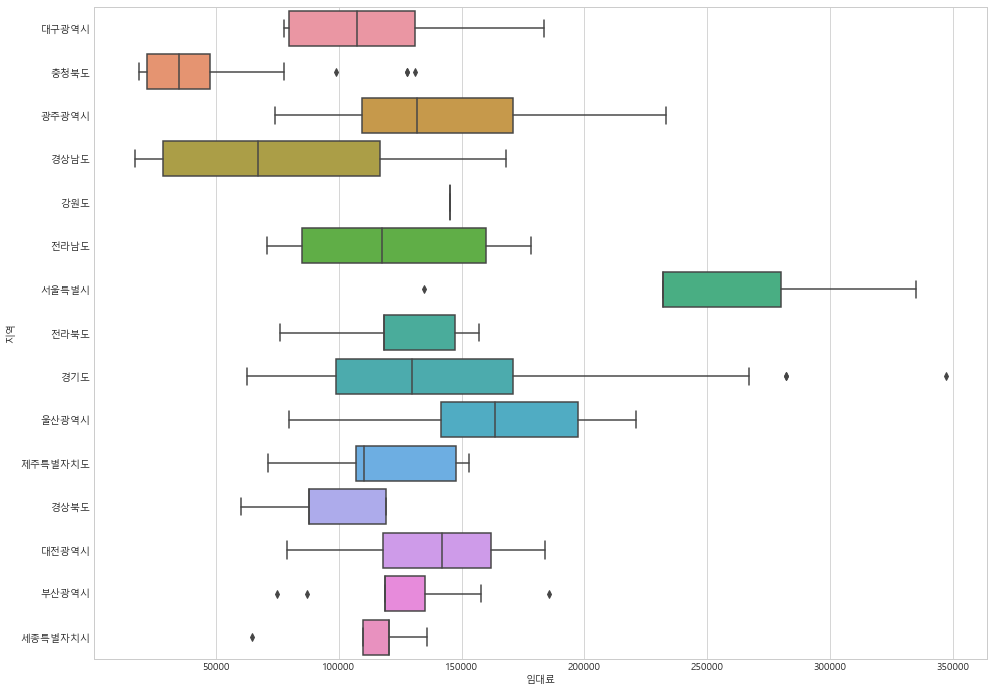

In [104]:
plt.figure(figsize=(16, 12))
sns.boxplot(x = "임대료",  data = df[(df['공급유형']=='행복주택')], y = '지역')

([<matplotlib.patches.Wedge at 0x21b58cc9978>,
 [Text(1.0400424226757994, -0.3582063079213624, '국민임대'),
  Text(-1.0446064057223425, -0.3446700699565441, '임대상가'),
  Text(-0.9650705796440473, 0.5278624596478733, '행복주택'),
  Text(-0.6372836000891144, 0.8965877609344541, '공공임대(10년)'),
  Text(-0.25247598021536843, 1.0706334010361758, '영구임대'),
  Text(-0.03689559538971648, 1.0993810599791314, '기타')],
 [Text(0.5672958669140723, -0.19538525886619765, '60.56%'),
  Text(-0.5697853122121868, -0.1880018563399331, '18.74%'),
  Text(-0.5264021343512985, 0.28792497798974903, '7.34%'),
  Text(-0.34760923641224417, 0.4890478696006113, '7.06%'),
  Text(-0.13771417102656458, 0.5839818551106413, '5.24%'),
  Text(-0.020124870212572622, 0.5996623963522535, '1.07%')])

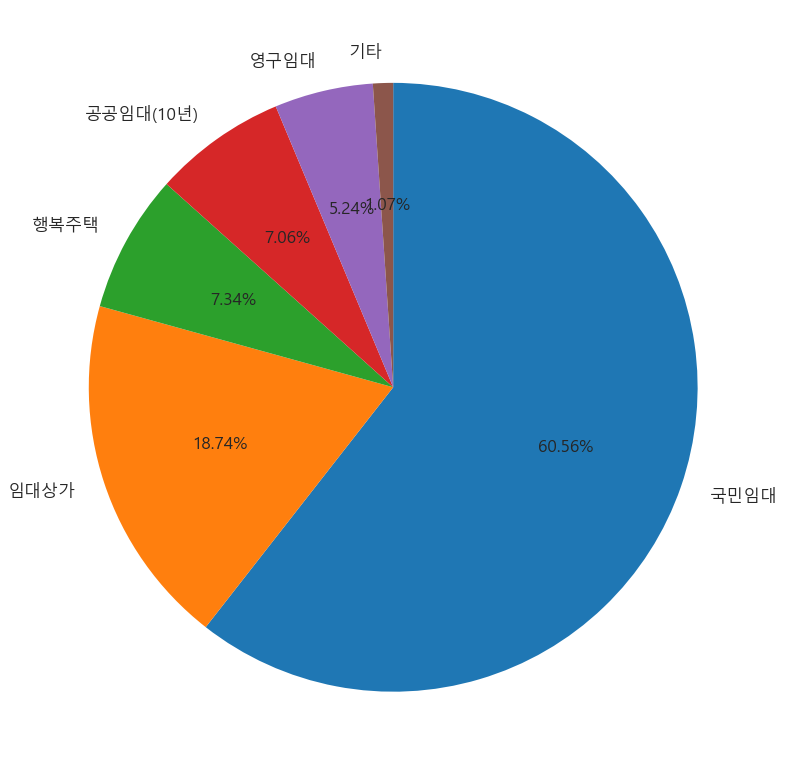

In [102]:
labels = list(train['공급유형'].value_counts().index[:5])
labels.append("기타")
fig = plt.figure(figsize=(14,14))
plt.pie(train['공급유형'].value_counts()[:6],
       startangle=90,
        labels = labels,
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p),
        textprops={'fontsize':17}
       )

([<matplotlib.patches.Wedge at 0x21b58ff55f8>,
 [Text(0.6063947748880104, -0.9177610674835359, '아파트'),
  Text(-0.6063947319245139, 0.9177610958709227, '상가')],
 [Text(0.33076078630255107, -0.5005969459001104, '81.41%'),
  Text(-0.3307607628679166, 0.5005969613841396, '18.59%')])

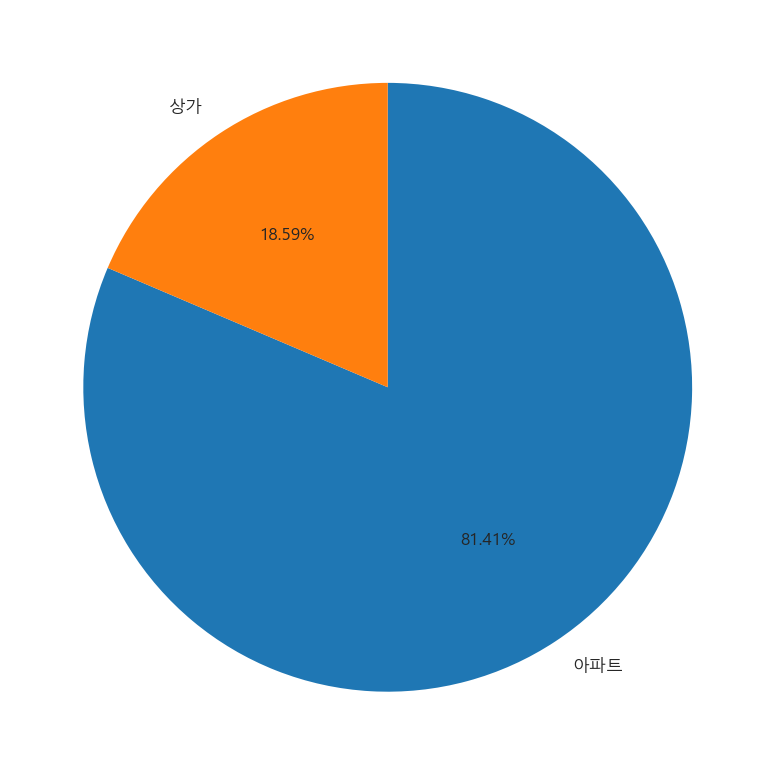

In [106]:
fig = plt.figure(figsize=(14,14))
plt.pie(train['임대건물구분'].value_counts(),
       startangle=90,
        labels = train['임대건물구분'].value_counts().index,
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p),
        textprops={'fontsize':17}
       )